<a href="https://colab.research.google.com/github/mini-u/BasicDL/blob/main/%5B2023_09_27_%EC%98%A4%ED%9B%84_2_26_50%5D_0_%EC%9C%A0%EC%84%B1%EB%AF%BC_%EC%8B%A4%EC%8A%B5%EB%A6%AC%ED%8F%AC%ED%8A%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습리포트3



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### (1) 활성화함수

- 문제: 계단함수, 시그모이드 함수, ReLU함수를 구현하여 동작을 그래프로 확인
- 실행결과: 계단함수와 시그모이드 함수 모두 0과 1 사이의 값을 가지며, 비선형 함수로 나타났다. 시그모이드는 함수의 경우 곡선을 따라 출력이 연속적으로 변하는 모습을 볼 수 있었다. ReLU 함수는 입력이 0을 넘으면 그대로 출력, 0이하이면 0을 출력하는 모습을 확인할 수 있었다.

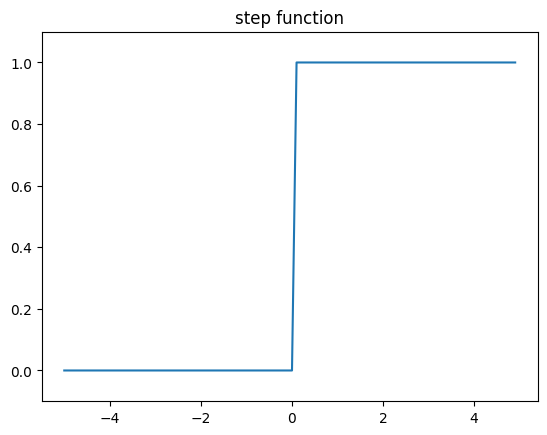

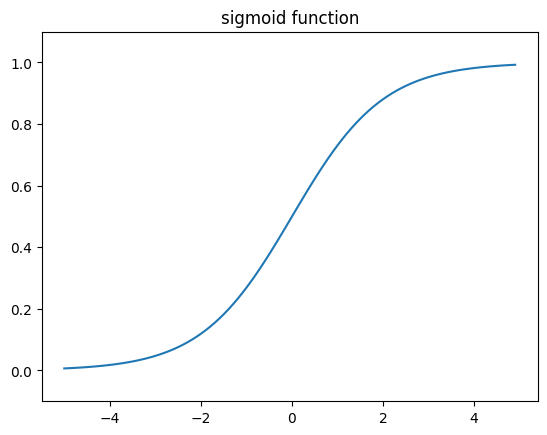

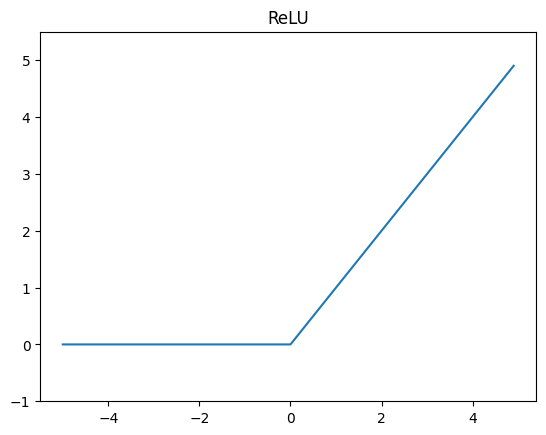

In [ ]:
#계단함수

def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

def step_function(x):
  y = x > 0
  return y.astype(int)

def step_function(x):
  return np.array(x>0, dtype=int)

x = np.arange(-5, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.title('step function', fontsize=12)
plt.ylim(-0.1,1.1)
plt.show()


#시그모이드 함수

def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.arange(-5, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.title('sigmoid function', fontsize=12)
plt.ylim(-0.1,1.1)
plt.show()


#렐루 함수

def relu(x):
  return np.maximum(0,x)

x = np.arange(-5, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.title('ReLU', fontsize=12)
plt.ylim(-1,5.5)
plt.show()


### (2) 3층 신경망 모델

- 문제: 은닉층의 활성화 함수는 ReLU함수 사용, 출력층 활성화 함수는 문제에 따라 항등함수 또는 시그모이드 함수 사용
-실행결과: 은닉층의 활성화 함수는 모두 ReLU를 사용하였다. 출력층 활성화함수의 변화에 따라 출력값이 달라졌다. 활성화 함수가 항등함수일 경우 0.4963, 시그모이드함수일 경우 0.621589424304725, 계단함수일 경우 1을 출력하였다.

In [ ]:
#가중치 및 편향벡터
W1 =np.array([[0.1, 0.3, 0.5], [0.2, 0.4,0.6]])
B1 =np.array([0.1,0.2,0.3])
W2 =np.array([[0.1,0.2], [0.3,0.4], [0.5,0.6]])
B2 =np.array([0.1, 0.2])
W3 =np.array([0.1, 0.2])
B3 =np.array(0.2)

#출력값 계산 - 은닉층 relu, 출력층 항등
X=np.array([0.1,1.0])
Z1=np.dot(X, W1) +B1
A1=relu(Z1)
Z2=np.dot(A1, W2) +B2
A2=relu(Z2)
A3=np.dot(A2, W3) +B3
Y_identity=A3
print("출력층 항등함수:",Y_identity)

#출력값 계산 - 은닉층 relu, 출력층 시그모이드
X=np.array([0.1,1.0])
Z1=np.dot(X, W1) +B1
A1=relu(Z1)
Z2=np.dot(A1, W2) +B2
A2=relu(Z2)
A3=np.dot(A2, W3) +B3
Y_sigmoid=sigmoid(A3)
print("출력층 시그모이드:",Y_sigmoid)

#출력값 계산 - 은닉층 relu, 출력층 계단함수
X=np.array([0.1,1.0])
Z1=np.dot(X, W1) +B1
A1=relu(Z1)
Z2=np.dot(A1, W2) +B2
A2=relu(Z2)
A3=np.dot(A2, W3) +B3
Y_step=step_function(A3)
print("출력층 계단함수:",Y_step)

출력층 항등함수: 0.4963
출력층 시그모이드: 0.621589424304725
출력층 계단함수: 1


### (3) Softmax 함수

- 문제: 소프트맥스 함수를 구현하여 입력값에 대한 출력값 비교
- 실행결과: 입력값이 비교적 작은 [0.3, 2.9, 4.0]의 경우 출력값이 잘 계산되어 나왔지만, 입력값을 크게 입력하면 오버플로우가 발생되어 nan(not a number) 가 출력된다.

In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

#입력값이 0.3, 2.9, 4.0일 경우
a= np.array([0.3, 2.9, 4.0])
y_a= softmax(a)
print("입력값이 [0.3, 2.9, 4.0]인 경우:", y_a)

#입력값이 1010, 1000, 990일 경우
b= np.array([1010, 1000, 990])
y_b= softmax(b)
print("입력값이 [1010, 1000, 990]인 경우:", y_b)

입력값이 [0.3, 2.9, 4.0]인 경우: [0.01821127 0.24519181 0.73659691]
입력값이 [1010, 1000, 990]인 경우: [nan nan nan]


<ipython-input-14-731581ef8092>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-14-731581ef8092>:4: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


 - 문제: 오버플로우를 고려한 소프트맥스 함수를 구현
 - 실행결과: 소프트맥스 함수는 지수 함수를 사용하여 오버플로우 문제를 고려해야한다. 방지하기 위한 변수 c를 추가하여 오버플로를 방지하였더니 [9.99954600e-01 4.53978686e-05 2.06106005e-09] 의 값이 나왔다.

In [ ]:
def softmax_over(a):
  c = np.max(a) #제일 큰 값을 max로 지정
  exp_a = np.exp(a-c) #브로드캐스팅
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

y_over_b= softmax_over(b)
print("오버플로우 미반영:", y_b)
print("오버플로우 고려:", y_over_b)

오버플로우 미반영: [nan nan nan]
오버플로우 고려: [9.99954600e-01 4.53978686e-05 2.06106005e-09]
